In [1]:
%pwd

In [2]:
import os
for filenames in os.listdir('dataset/'):
        print(os.path.join("dataset/", filenames))

In [3]:
import numpy as np 
import pandas as pd

import random

import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator, load_img

import matplotlib.pyplot as plt

In [4]:
base_dir = os.path.join("dataset/Rock-Paper-Scissors")
print("Base directory --> ", os.listdir(base_dir))

Base directory -->  ['Own images-20211128T091708Z-001.zip', 'test', 'train', 'validation']


# Dataset Path

In [5]:
train_dir = os.path.join("dataset/Rock-Paper-Scissors/train/")
print("Train datapath contains: ", os.listdir(train_dir))


val_dir = os.path.join("dataset/Rock-Paper-Scissors/validation/")
print("Validation datapath contains: ", os.listdir(val_dir))

test_dir = os.path.join("dataset/Rock-Paper-Scissors/test/")
print("Test datapath contains: ", os.listdir(test_dir))


Train datapath contains:  ['paper', 'rock', 'scissors']
Validation datapath contains:  ['paper', 'rock', 'scissors']
Test datapath contains:  ['IMG_1091.JPG', 'IMG_1092.JPG', 'IMG_1093.JPG', 'IMG_1094.JPG', 'IMG_1095.JPG', 'IMG_1096.JPG', 'IMG_1098.JPG', 'paper-hires1.png', 'paper-hires2.png', 'paper1.png', 'paper2.png', 'paper3.png', 'paper4.png', 'paper5.png', 'paper6.png', 'paper7.png', 'paper8.png', 'paper9.png', 'rock-hires1.png', 'rock-hires2.png', 'rock1.png', 'rock2.png', 'rock3.png', 'rock4.png', 'rock5.png', 'rock6.png', 'rock7.png', 'rock8.png', 'rock9.png', 'scissors-hires1.png', 'scissors-hires2.png', 'scissors1.png', 'scissors2.png', 'scissors3.png', 'scissors4.png', 'scissors5.png', 'scissors6.png', 'scissors7.png', 'scissors8.png', 'scissors9.png']


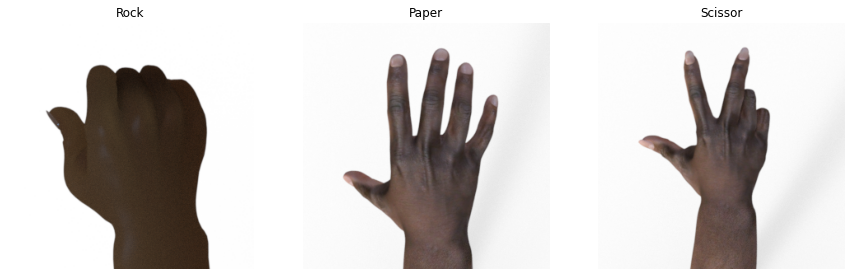

In [6]:
fig, ax = plt.subplots(1, 3, figsize=(15, 10))

sample_rock = random.choice(os.listdir(train_dir + "rock"))
image = load_img(train_dir + "rock/" + sample_rock)
ax[0].imshow(image)
ax[0].set_title("Rock")
ax[0].axis("Off")

sample_paper = random.choice(os.listdir(train_dir + "paper"))
image = load_img(train_dir + "paper/" + sample_paper)
ax[1].imshow(image)
ax[1].set_title("Paper")
ax[1].axis("Off")

sample_scissor = random.choice(os.listdir(train_dir + "scissors"))
image = load_img(train_dir + "scissors/" + sample_scissor)
ax[2].imshow(image)
ax[2].set_title("Scissor")
ax[2].axis("Off")

plt.show()

# Modeling the NN

In [7]:
model = tf.keras.models.Sequential([
    
    tf.keras.layers.Conv2D(32, (3,3), activation='relu', input_shape=(150, 150, 3)),
    tf.keras.layers.MaxPooling2D(2, 2),
    
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    
    tf.keras.layers.Conv2D(128, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    
    tf.keras.layers.Conv2D(128, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(512, activation='relu'),
    
    tf.keras.layers.Dense(3, activation='softmax')
])

In [8]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 148, 148, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 74, 74, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 72, 72, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 36, 36, 64)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 34, 34, 128)       73856     
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 17, 17, 128)      0

In [9]:
model.compile(loss = 'categorical_crossentropy',
              optimizer = 'adam',
              metrics = ['accuracy'])

Callback

In [10]:
class myCallback(tf.keras.callbacks.Callback):
    def on_epoch_end(self, epoch, logs={}):
        if(logs.get('accuracy')>0.95):
            print("\nReached >95% accuracy so cancelling training!")
            self.model.stop_training = True
        
callbacks = myCallback()

Training Generator

In [11]:
train_datagen = ImageDataGenerator(
      rescale=1./255,
      rotation_range=40,
      width_shift_range=0.2, # Shifting image width by 20%
      height_shift_range=0.2,# Shifting image height by 20%
      shear_range=0.2,       # Rotation across X-axis by 20%
      zoom_range=0.2,        # Image zooming by 20%
      horizontal_flip=True,
      fill_mode='nearest')

train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size = (150, 150),
    class_mode = 'categorical',
    batch_size = 20
)

Found 2520 images belonging to 3 classes.


Validation Generator

In [12]:
validation_datagen = ImageDataGenerator(rescale=1./255)

validation_generator = validation_datagen.flow_from_directory(
    val_dir,
    target_size = (150, 150),
    class_mode = 'categorical',
    batch_size = 20
)

Found 372 images belonging to 3 classes.


In [13]:
history = model.fit(
      train_generator,
      steps_per_epoch = np.ceil(2520/20),  # 2520 images = batch_size * steps
      epochs = 10,
      validation_data=validation_generator,
      validation_steps = np.ceil(372/20),  # 372 images = batch_size * steps
      callbacks=[callbacks],
      verbose = 2)

Epoch 1/10
126/126 - 28s - loss: 0.9598 - accuracy: 0.4905 - val_loss: 0.2547 - val_accuracy: 0.9032 - 28s/epoch - 225ms/step
Epoch 2/10
126/126 - 28s - loss: 0.4625 - accuracy: 0.8087 - val_loss: 0.1719 - val_accuracy: 0.9892 - 28s/epoch - 223ms/step
Epoch 3/10
126/126 - 28s - loss: 0.2903 - accuracy: 0.8905 - val_loss: 0.1163 - val_accuracy: 0.9570 - 28s/epoch - 219ms/step
Epoch 4/10
126/126 - 28s - loss: 0.1788 - accuracy: 0.9337 - val_loss: 0.0568 - val_accuracy: 0.9731 - 28s/epoch - 219ms/step
Epoch 5/10
126/126 - 28s - loss: 0.1412 - accuracy: 0.9500 - val_loss: 0.0699 - val_accuracy: 0.9624 - 28s/epoch - 219ms/step
Epoch 6/10

Reached >95% accuracy so cancelling training!
126/126 - 28s - loss: 0.1045 - accuracy: 0.9627 - val_loss: 0.1489 - val_accuracy: 0.9328 - 28s/epoch - 220ms/step


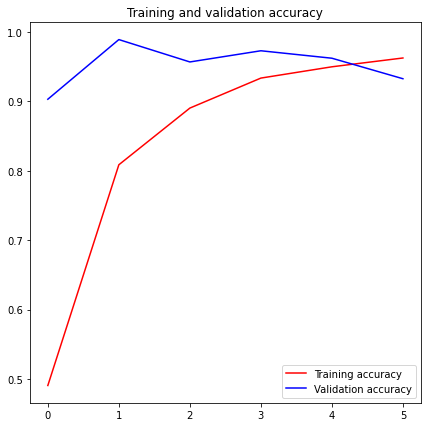

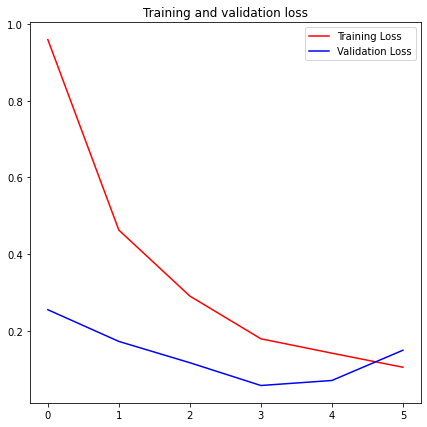

In [14]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.figure(figsize=(7,7))

plt.plot(epochs, acc, 'r', label='Training accuracy')
plt.plot(epochs, val_acc, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure(figsize=(7,7))

plt.plot(epochs, loss, 'r', label='Training Loss')
plt.plot(epochs, val_loss, 'b', label='Validation Loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

In [52]:
del test_df

In [53]:
test_img = os.listdir(os.path.join(test_dir))

test_df = pd.DataFrame({'Image': test_img})
test_df

,Image
0,IMG_1108.JPG
1,IMG_1109.JPG
2,IMG_1110.JPG
3,IMG_1112.JPG
4,IMG_1113.JPG
5,IMG_1114.JPG
6,IMG_1115.JPG
7,paper-hires1.png
8,paper-hires2.png
9,paper1.png


In [54]:
test_gen = ImageDataGenerator(rescale=1./255)

test_generator = test_gen.flow_from_dataframe(
    test_df, 
    test_dir, 
    x_col = 'Image',
    y_col = None,
    class_mode = None,
    target_size = (150, 150),
    batch_size = 20,
    shuffle = False
)

Found 40 validated image filenames.


In [55]:
predict = model.predict(test_generator, steps = int(np.ceil(33/20)))

In [56]:
label_map = dict((v,k) for k,v in train_generator.class_indices.items())
label_map

{0: 'paper', 1: 'rock', 2: 'scissors'}

In [57]:
test_df['Label'] = np.argmax(predict, axis = -1) # axis = -1 --> To compute the max element index within list of lists

test_df['Label'] = test_df['Label'].replace(label_map)

In [58]:
test_df

,Image,Label
0,IMG_1108.JPG,rock
1,IMG_1109.JPG,scissors
2,IMG_1110.JPG,paper
3,IMG_1112.JPG,rock
4,IMG_1113.JPG,paper
5,IMG_1114.JPG,scissors
6,IMG_1115.JPG,paper
7,paper-hires1.png,paper
8,paper-hires2.png,paper
9,paper1.png,paper


In [59]:
test_df.Label.value_counts()

scissors    16
rock        13
paper       11
Name: Label, dtype: int64

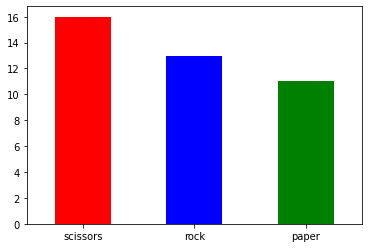

In [60]:
test_df.Label.value_counts().plot.bar(color = ['red','blue','green'])
plt.xticks(rotation = 0)
plt.show()

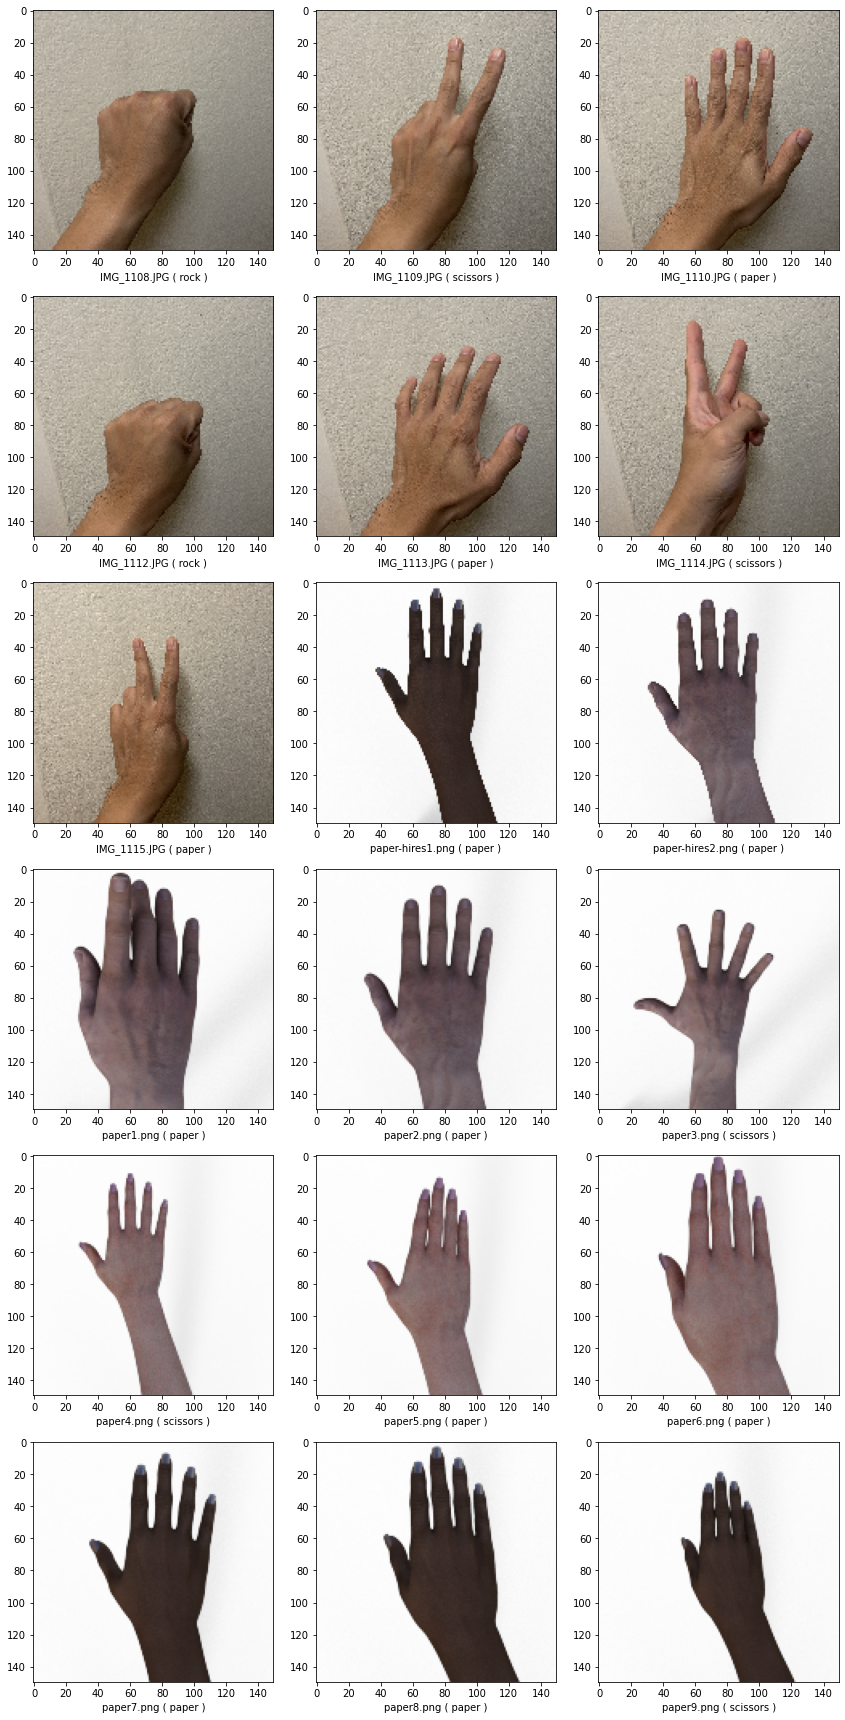

In [65]:
v = random.randint(0, 25)

sample_test = test_df.iloc[v:(v+18)].reset_index(drop = True)
sample_test.head()

plt.figure(figsize=(12, 24))
for index, row in sample_test.iterrows():
    filename = row['Image']
    category = row['Label']
    img = load_img(test_dir + filename, target_size = (150, 150))
    plt.subplot(6, 3, index + 1)
    plt.imshow(img)
    plt.xlabel(filename + ' ( ' + "{}".format(category) + ' )' )
plt.tight_layout()
plt.show()

In [24]:
lis = []
for ind in test_df.index: 
    if(test_df['Label'][ind] in test_df['Image'][ind]):
        lis.append(1)
    else:
        lis.append(0)

In [25]:
print("Accuracy of the model on test data is {:.2f}".format((sum(lis)/len(lis))*100))

Accuracy of the model on test data is 75.00
